### Libraries

In [24]:
import pandas as pd
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

In [30]:
X = []
y = []
df = pd.read_csv('english.csv') 

In [33]:
total = len(df)
for index, row in df.iterrows():
    img_path = row['image']
    label = row['label']
    img = Image.open(img_path).convert('L')
    img = img.resize((28, 28))
    img = np.array(img).flatten() / 255.0
    X.append(img)
    y.append(label)
    img_processed = index + 1
    progress = f'{img_processed}/{total}'
    print(f'Processing image {progress}', end='\r')
X = np.array(X)
y = np.array(y)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

### Train and Test data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### Train SVM Model

In [35]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [36]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.47947214076246336


In [37]:
cv = KFold(n_splits=5, random_state=40, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

In [38]:
print(f'Fold Accuracy: {scores}')
print(f'Std: {scores.std()}')
print(f'Mean: {scores.mean()}')

Fold Accuracy: [0.47947214 0.51612903 0.47360704 0.44868035 0.44868035]
Std: 0.02483855387432223
Mean: 0.47331378299120236


In [47]:
nueva_imagen = Image.open('m.png').convert('L')
nueva_imagen = nueva_imagen.resize((28, 28))
nueva_imagen = np.array(nueva_imagen).flatten() / 255.0
nueva_imagen = np.array([nueva_imagen])

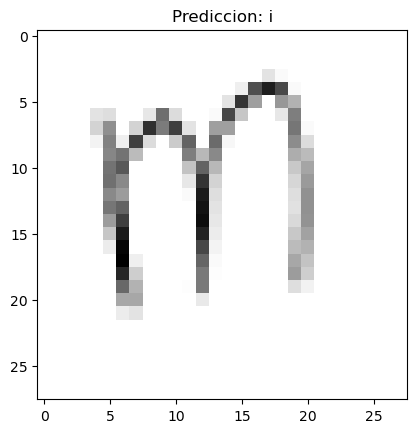

In [48]:
prediccion = model.predict(nueva_imagen)
plt.imshow(nueva_imagen.reshape(28, 28), cmap='gray')
plt.title(f'Prediccion: {prediccion[0]}')
plt.show()